
# Microservice-Architektur für SecondStyle

## Übersicht der Microservices

| Service              | Beschreibung                                               | Datenbank            | API vorhanden | Kommunikation             |
|----------------------|------------------------------------------------------------|----------------------|---------------|----------------------------|
| **API Gateway**       | Zentrale Schnittstelle für alle Anfragen                   | ❌                   | ✅             | Verteilt synchron Anfragen |
| **User Service**      | Registrierung, Login, Rollenmanagement                     | PostgreSQL           | ✅             | REST synchron              |
| **Artikel Service**   | Artikel einstellen, bearbeiten, suchen                     | PostgreSQL           | ✅             | REST synchron              |
| **Zahlungsservice**   | Zahlungen, Transaktionen                                   | PostgreSQL           | ✅             | REST + Events              |
| **Versandservice**    | Versandabwicklung, Labels, Tracking                        | PostgreSQL           | ✅             | Asynchron (Event-basiert)  |
| **Community Service** | Bewertungen, Likes, Nachrichten                            | MongoDB/PostgreSQL   | ✅             | REST synchron              |
| **Notification Service** | E-Mail & SMS Benachrichtigungen                         | ❌                   | ✅             | Asynchron (Events)         |
| **Admin Service**     | Monitoring, Moderation, Statistiken                        | Teilweise (via APIs) | ✅             | REST synchron              |

---

## Kommunikationstypen

| Von → Nach                          | Typ         |
|------------------------------------|-------------|
| Client → API Gateway → Services    | Synchron    |
| Zahlungsservice → Versandservice   | Asynchron   |
| Versandservice → Notification      | Asynchron   |
| Admin Service → andere Services    | Synchron    |

---

## PlantUML-Komponenten-Diagramm

```plantuml
@startuml
!define RECTANGLE class
skinparam componentStyle rectangle

package "Clients" {
    actor "Web User" as WebUser
    actor "Mobile App User" as MobileUser
    [Web UI] as WebUI
    [Mobile App] as MobileApp

    WebUser --> WebUI
    MobileUser --> MobileApp
}

package "SecondStyle System" {

    [API Gateway] as Gateway

    component "User Service" as User
    component "Artikel Service" as Artikel
    component "Zahlungsservice" as Payment
    component "Versandservice" as Shipping
    component "Community Service" as Community
    component "Notification Service" as Notification
    component "Admin Service" as Admin

    database "User DB\n(PostgreSQL)" as UserDB
    database "Artikel DB\n(PostgreSQL)" as ArtikelDB
    database "Zahlungs-DB\n(PostgreSQL)" as PaymentDB
    database "Versand-DB\n(PostgreSQL)" as ShippingDB
    database "Community-DB\n(Mongo/PostgreSQL)" as CommunityDB

    ' Clients → Gateway
    WebUI --> Gateway
    MobileApp --> Gateway

    ' Gateway → Microservices
    Gateway --> User : REST
    Gateway --> Artikel : REST
    Gateway --> Payment : REST
    Gateway --> Community : REST
    Gateway --> Admin : REST

    ' DB-Verbindungen
    User --> UserDB
    Artikel --> ArtikelDB
    Payment --> PaymentDB
    Shipping --> ShippingDB
    Community --> CommunityDB

    ' Services untereinander
    Payment --> Shipping : Event (asynchron)
    Shipping --> Notification : Event (asynchron)
    Payment --> User : REST (User-Daten für Zahlung)
    Artikel --> User : REST (Verkäufer-Zuordnung)
    Community --> User : REST (Bewertungen etc.)
    Admin --> User : REST
    Admin --> Artikel : REST
    Admin --> Payment : REST

    Notification ..> User : E-Mail/SMS
}

package "Externe Adapter" {
    [Stripe Adapter] as Stripe
    [Twilio Adapter] as Twilio
    [SendGrid Adapter] as SendGrid

    Payment --> Stripe : Zahlungsabwicklung
    Notification --> Twilio : SMS
    Notification --> SendGrid : E-Mail
}
@enduml

```


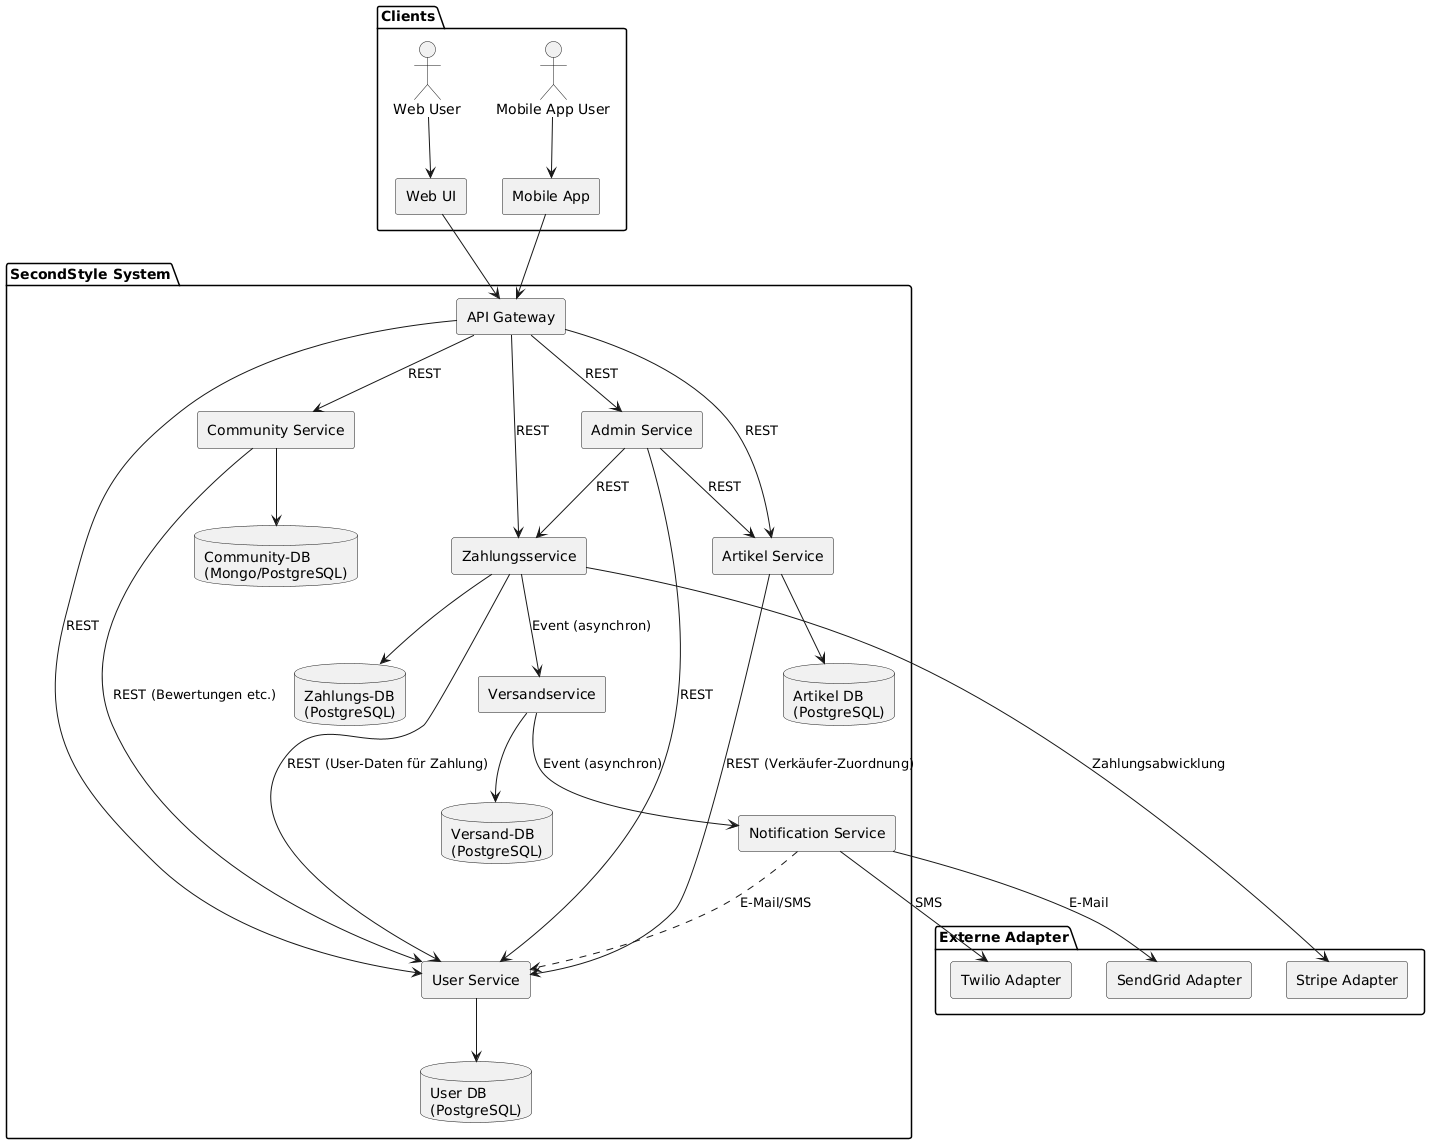